In [1]:
%matplotlib widget

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


# Visualize Field Case results

Date created: 20/04/2024
Author: @mariacarrizo

In [2]:
# Import libraries
import numpy as np
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import colors
import pandas as pd
import copy
import matplotlib
import sys
sys.path.insert(1, '../src')

# Import forward function for 2-layered 1D models in field case
from EM1D import EMf_2Lay_HV_field
from Plots import PlotLine, distance

In [3]:
# Load survey parameters
survey = np.load('data/survey_field.npy', allow_pickle=True).item()
offsets = survey['offsets']
height = survey['height']
freq = survey['freq']
lambd = survey['lambd']
filt = survey['filt']

# Load estimated models
model_GS = np.load('results/model_2Lay_GS_field.npy')
model_GN = np.load('results/model_2Lay_GN_field.npy')

# Load field data
Dataframe = pd.DataFrame(np.load('data/Field_data.npy'),
                        columns = ['X','Y','Position','Z','H2Q','H4Q','H8Q',
                                   'V2Q','V4Q','V8Q','P2Q','P4Q','P8Q',
                                   'H4IP','H8IP','V4IP','V8IP'])

In [4]:
# Positions elevations
elev = np.array(Dataframe['Z'])

# Positions coordinates
X = np.array(Dataframe['X'])
Y = np.array(Dataframe['Y'])

# Data used for the estimations
data_true = np.array(pd.concat([Dataframe.loc[:,'H2Q':'V8Q'], Dataframe.loc[:,'H4IP':]], axis=1))


# Maps of estimated models

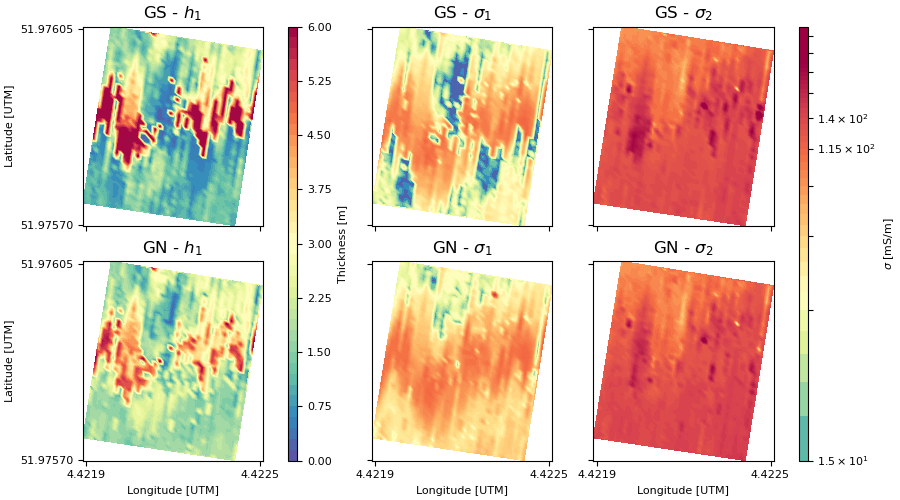

In [6]:
fig, ax = plt.subplots(2,3, sharey=True, sharex=True, figsize=(9,5), layout='constrained')

cb = ax[0,0].tricontourf(X, Y, model_GS[:,0], vmin=0, vmax=6, levels=50, cmap='Spectral_r')
ax[0,0].set_yticks([np.round(np.min(Y),5), np.round(np.max(Y),5)])
ax[0,0].ticklabel_format(useOffset=False)
ax[0,0].set_xticks([np.round(np.min(X),4), np.round(np.max(X),4)])
ax[0,0].tick_params(labelsize=8)
ax[0,0].set_title('GS - $h_1$')
ax[0,0].set_ylabel('Latitude [UTM]', fontsize=8)

ax[1,0].tricontourf(X, Y, model_GN[:,0], vmin=0, vmax=6, levels=50, cmap='Spectral_r')
ax[1,0].set_xticks([np.round(np.min(X),4), np.round(np.max(X),4)])
ax[1,0].tick_params(labelsize=8)
ax[1,0].set_title('GN - $h_1$')
ax[1,0].set_xlabel('Longitude [UTM]', fontsize=8)

clb = fig.colorbar(cb, ax=ax[:,0], location='right', aspect=50)
clb.set_label('Thickness [m]', fontsize=8)
clb.ax.tick_params(labelsize=8)

cb = ax[0,1].tricontourf(X, Y, model_GS[:,1]*1000,  norm='log', levels=50, vmin=10, vmax = 200, cmap='Spectral_r')
ax[0,1].set_yticks([np.round(np.min(Y),5), np.round(np.max(Y),5)])
ax[0,1].ticklabel_format(useOffset=False)
ax[0,1].set_xticks([np.round(np.min(X),4), np.round(np.max(X),4)])
ax[0,1].tick_params(labelsize=8)
ax[0,1].set_title('GS - $\sigma_1$')
ax[1,0].set_ylabel('Latitude [UTM]', fontsize=8)

ax[1,1].tricontourf(X, Y, model_GN[:,1]*1000,  norm='log', levels=50, vmin=10, vmax = 200, cmap='Spectral_r')
ax[1,1].set_xticks([np.round(np.min(X),4), np.round(np.max(X),4)])
ax[1,1].tick_params(labelsize=8)
ax[1,1].set_title('GN - $\sigma_1$')
ax[1,1].set_xlabel('Longitude [UTM]', fontsize=8)

cb = ax[0,2].tricontourf(X, Y, model_GS[:,2]*1000,  norm='log', levels=50, vmin=10, vmax = 200, cmap='Spectral_r')
ax[0,2].set_yticks([np.round(np.min(Y),5), np.round(np.max(Y),5)])
ax[0,2].ticklabel_format(useOffset=False)
ax[0,2].set_xticks([np.round(np.min(X),4), np.round(np.max(X),4)])
ax[0,2].tick_params(labelsize=8)
ax[0,2].set_title('GS - $\sigma_2$')

ax[1,2].tricontourf(X, Y, model_GN[:,2]*1000,  norm='log', levels=50, vmin=10, vmax = 200, cmap='Spectral_r')
ax[1,2].set_xticks([np.round(np.min(X),4), np.round(np.max(X),4)])
ax[1,2].tick_params(labelsize=8)
ax[1,2].set_title('GN - $\sigma_2$')
ax[1,2].set_xlabel('Longitude [UTM]', fontsize=8)

clb = fig.colorbar(cb, ax=ax[:,2], location='right', aspect=50)
clb.set_label('$\sigma$ [mS/m]', fontsize=8)
clb.ax.tick_params(labelsize=8)

plt.savefig('figures/Map_Field.eps', format='eps')

# Plot cross-sections of estimated models

In [7]:
# Review lines

# Define positions
Line1_pos = np.linspace(0,49,49,endpoint=False,dtype=int)
Line2_pos = np.linspace(900,949,949,endpoint=False,dtype=int)
Line3_pos = np.linspace(1650,1699,1699,endpoint=False, dtype=int)

dist_L1 = distance(Y[0], Y[49], X[0], X[49])
dist_L2 = distance(Y[900], Y[949], X[900], X[949])
dist_L3 = distance(Y[1650], Y[1699], X[1650], X[1699])

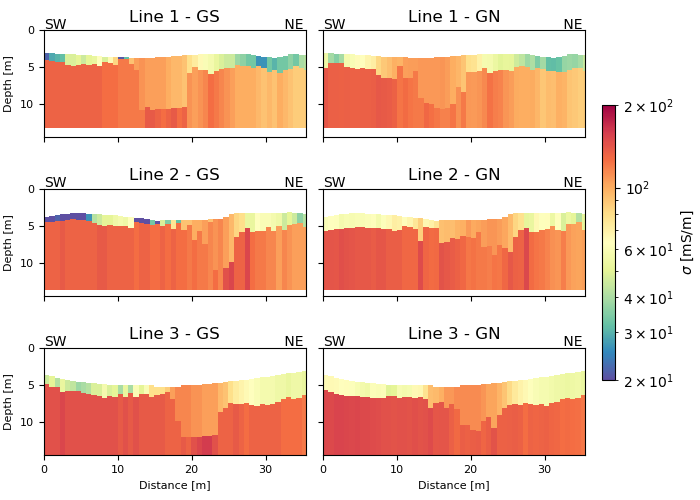

In [9]:
fig, ax = plt.subplots(3,2, sharex=True, sharey=True, figsize=(7,5), layout='constrained')

c = PlotLine(ax[0,0], model_GS[:50,:], elev[:50], dist_L1, vmin=20, vmax=200, ylab=True)
ax[0,0].set_title('Line 1 - GS')
ax[0,0].text(0.1,-0.2,'SW')
ax[0,0].text(32,-0.2,' NE')

PlotLine(ax[0,1], model_GN[:50,:], elev[:50], dist_L1, vmin=20, vmax=200)
ax[0,1].set_title('Line 1 - GN')
ax[0,1].text(0.1,-0.2,'SW')
ax[0,1].text(32,-0.2,' NE')

PlotLine(ax[1,0], model_GS[900:950,:], elev[900:950], dist_L2, vmin=20, vmax=200, ylab=True)
ax[1,0].set_title('Line 2 - GS')
ax[1,0].text(0.1,-0.2,'SW')
ax[1,0].text(32,-0.2,' NE')

PlotLine(ax[1,1], model_GN[900:950,:], elev[900:950], dist_L2, vmin=20, vmax=200)
ax[1,1].set_title('Line 2 - GN')
ax[1,1].text(0.1,-0.2,'SW')
ax[1,1].text(32,-0.2,' NE')

PlotLine(ax[2,0], model_GS[1650:1700,:], elev[1650:1700], dist_L3, vmin=20, vmax=200, ylab=True, xlab=True)
ax[2,0].set_title('Line 3 - GS')
ax[2,0].text(0.1,-0.2,'SW')
ax[2,0].text(32,-0.2,' NE')

PlotLine(ax[2,1], model_GN[1650:1700,:], elev[1650:1700], dist_L3, vmin=20, vmax=200, xlab=True)
ax[2,1].set_title('Line 3 - GN')
ax[2,1].text(0.1,-0.2,'SW')
ax[2,1].text(32,-0.2,' NE')

clb = fig.colorbar(c, ax=ax[:,1], location='right', shrink=0.6)
clb.set_label('$\sigma$ [mS/m]', )
clb.ax.tick_params()




In [10]:
data_GS = []
data_GN = []

for pos in range(len(data_true)):
    
    data_GS.append(EMf_2Lay_HV_field(lambd,
                                      sigma1 = model_GS[pos,0],
                                      sigma2 = model_GS[pos,1],
                                      h1 = model_GS[pos,2],
                                      height = height,
                                      offsets = offsets,
                                      freq = freq,
                                      filt = filt))

    data_GN.append(EMf_2Lay_HV_field(lambd,
                                      sigma1 = model_GN[pos,0],
                                      sigma2 = model_GN[pos,1],
                                      h1 = model_GN[pos,2],
                                      height = height,
                                      offsets = offsets,
                                      freq = freq,
                                      filt = filt))

    
# Transform data to parts per thousand [ppt]
data_GS = np.array(data_GS)*1e3
data_GN = np.array(data_GN)*1e3
data_true = data_true*1e3

# Calculate RMSE for each method

RMSE_GS= root_mean_squared_error(data_GS.ravel(), data_true.ravel())
RMSE_GN = root_mean_squared_error(data_GN.ravel(), data_true.ravel())

# Print RMSE in ppt

RMSE = pd.DataFrame([RMSE_GS, RMSE_GN],
                    index= ['GS', 'GN'],
                   columns=['RMSE [ppt]'])

print('Table 6')
print(RMSE)

Table 6
    RMSE [ppt]
GS   31.152248
GN   24.376985
